# Table of Contents

## Data Preparation and Exploration
- Feature Engineering
- Missing Value Imputation
- Creating Dummies

## Data Visualization
- Libraries
    - Matplotlib
    - Pandas Visualization
    - Seaborn
    - Tableau
- Common used plots
    - Scatter plot
    - Line chart
    - Histogram
    - Bar chart
    - Box plot
    - Heatmap
    - Pair plot
    - Faceting

## Data Acquisition (External)
- Web Scraping
- APIs

## Hack Project: Election Day
- Project description

# I. Data Preparation and Exploration
## 1.0 Data Collection and Understanding

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Dictionary
- PassengerId
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

### 1.1 Feature Engineering

#### 1.1.1 Name to Title

In [5]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [6]:
# another option
def name_to_title(name):
    return name.split(',')[1].split('.')[0].strip()

train['Title1'] = train['Name'].apply(name_to_title)
train.Title1.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title1, dtype: int64

In [7]:
# mapping

#### 1.1.2 Family size

In [8]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### <span style="color:green">Q: Can you try feature engineering on another feature?</span>.

### 1.2 Missing Value Imputation

#### 1.2.1 Missing Age

In [9]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
FamilySize       0
dtype: int64

In [11]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    46.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

### <span style="color:green">Q: How do you decide which of 3'M to use for missing value imputation?</span>

#### 1.2.2 missing Embarked

In [12]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train['Embarked'] = train['Embarked'].fillna('S')

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Title1           0
FamilySize       0
dtype: int64

### 1.3 Creating Dummies

In [15]:
train1 = train[['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked', 'Title']]

In [16]:
train2 = pd.get_dummies(train1, drop_first=True)
train2.head()

,Survived,Pclass,Age,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,22.0,2,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,38.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,35.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,3,35.0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
train2.shape

(891, 23)

### <span style="color:green">Q: Why should we set "drop_first=True"?</span>

# II. Data Visualization

## 2.0 Import data and graphing libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
seaborn.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

## 2.1 Matplotlib

In [19]:
x = np.arange(20)
y = np.random.normal(10, 1, 20)
z = np.random.normal(10, 2, 20)

Q: Why is it important for all of your data to be the same length?

Text(0, 0.5, 'y')

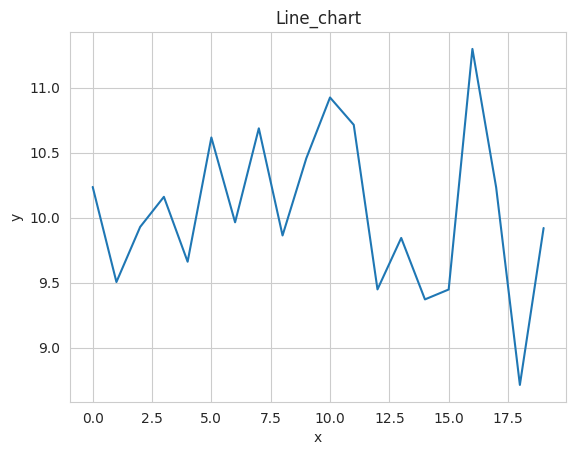

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_title('Line_chart')
ax.set_xlabel('x')
ax.set_ylabel('y')

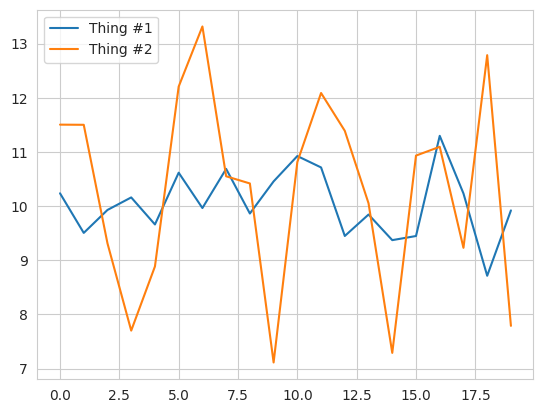

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label = 'Thing #1')
ax.plot(x, z, label = 'Thing #2')
ax.legend()

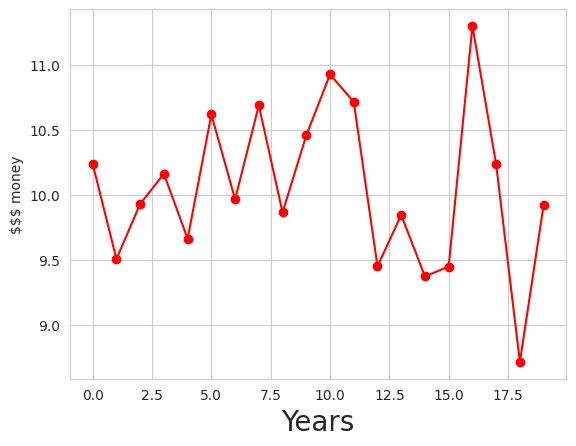

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, marker = 'o', c = '#FF0000')
ax.set_ylabel('$$$ money', fontsize=10)
ax.set_xlabel('Years', fontsize=20)
fig.savefig('figure.png', dpi=300)

Text(0.5, 0.98, 'Visualization')

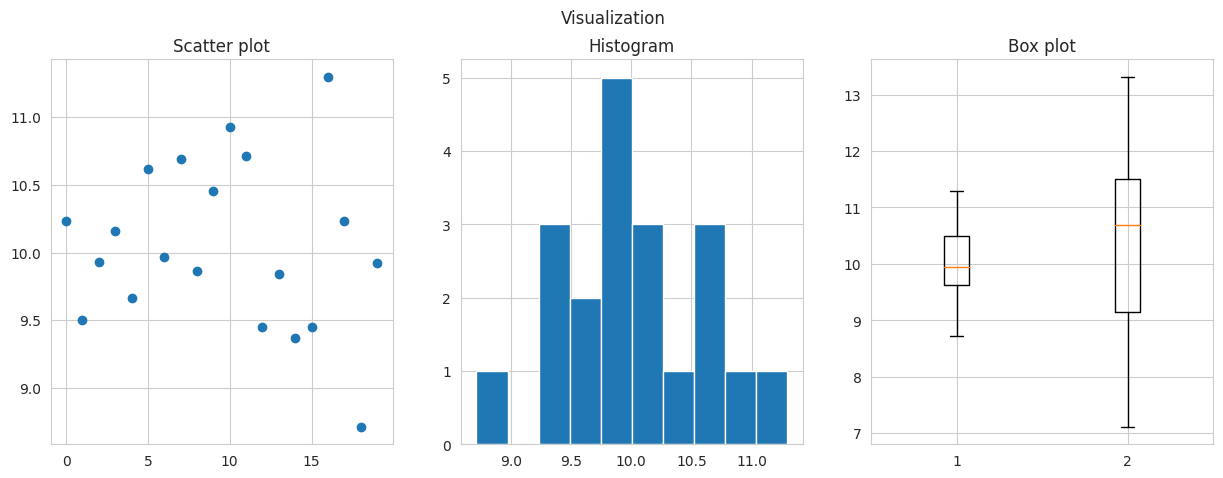

In [23]:
fig2 = plt.figure(figsize = (15,5))
a = fig2.add_subplot(131)
a.scatter(x, y)
a.set_title('Scatter plot')

b = fig2.add_subplot(132)
b.hist(y)
b.set_title('Histogram')

c = fig2.add_subplot(133)
c.boxplot([y,z])
c.set_title('Box plot')

fig2.suptitle('Visualization')

### <span style="color:green">Q: What is the main difference between a line plot & a scatter plot?</span>

### Exercises
#### 1. Create a figure with 4 subplots.
- A. Histogram of Ages of Titanic
- B. Scatterplot of Age vs Fares
- C. Boxplot of Ages of Survivors vs Deceased
- D. Boxplot of Ages of Men vs Women
#### 2. Interpret each chart you created
- A. Does it show anything interesting?
- B. Does it help you figure out who will survive?
#### 3. Pick a chart from the matplotlib gallery & recreate it in your notebook.

## 2.2 Pandas Visualization

<Axes: title={'center': 'Scatter plot'}, xlabel='Age', ylabel='Fare'>

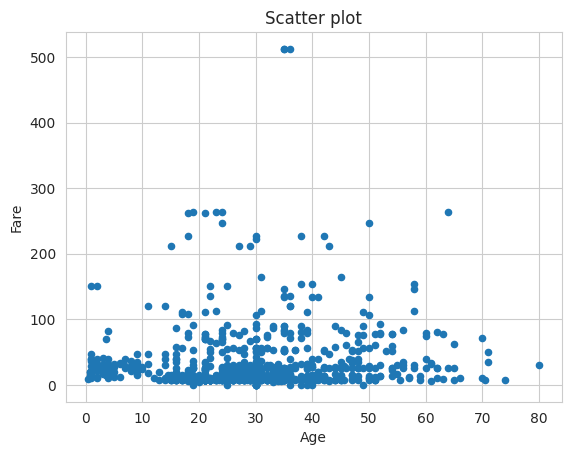

In [24]:
train.plot.scatter(x='Age', y='Fare', title='Scatter plot')

<Axes: title={'center': 'Line chart'}>

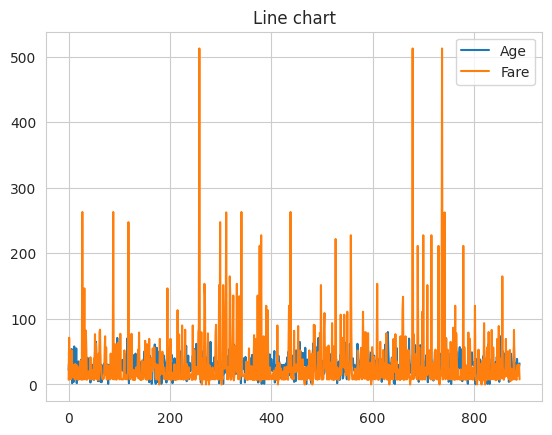

In [25]:
train[['Age', 'Fare']].plot.line(title='Line chart')

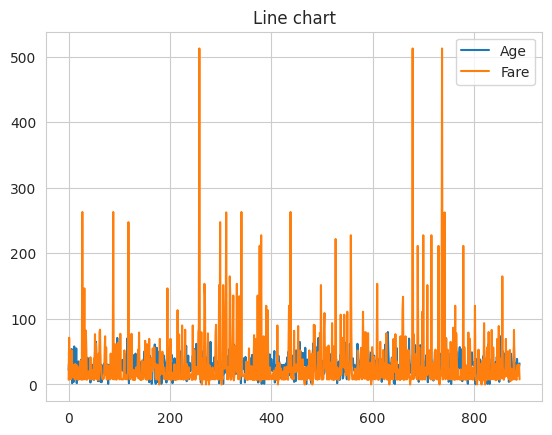

In [26]:
train[['Age', 'Fare']].plot.line(title='Line chart');

<Axes: ylabel='Frequency'>

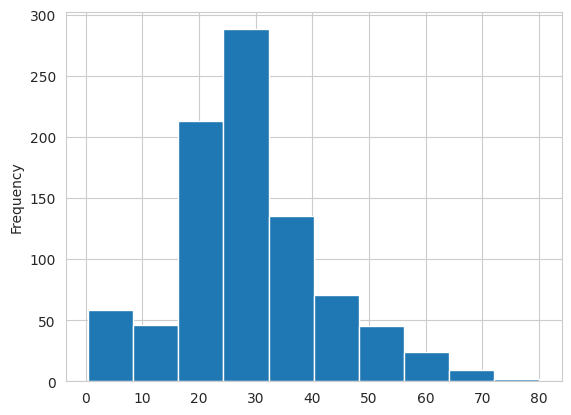

In [27]:
train['Age'].plot.hist()

In [28]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

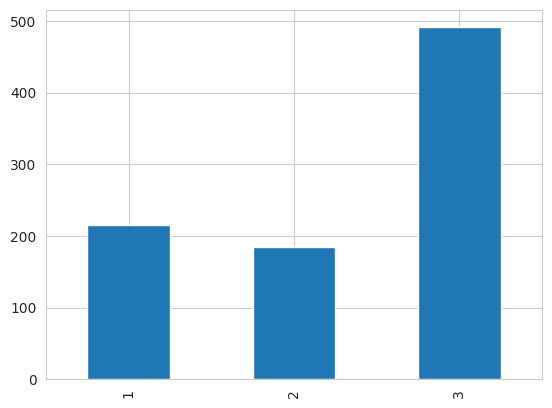

In [29]:
train['Pclass'].value_counts().sort_index().plot.bar()

<Axes: >

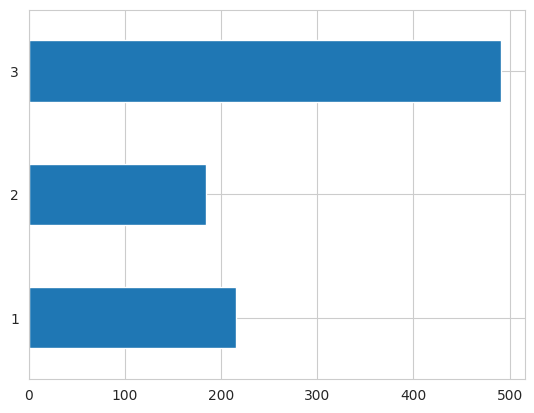

In [30]:
train['Pclass'].value_counts().sort_index().plot.barh()

<Axes: >

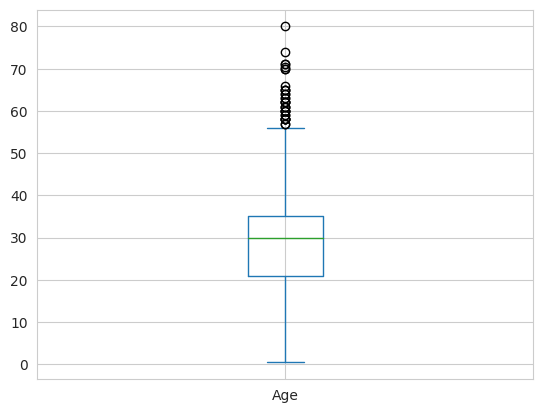

In [31]:
train['Age'].plot.box()

### <span style="color:green">Q: What do we use a histogram for?</span>

### <span style="color:green">Q: What do we use a boxplot for?</span>

## 2.3 Seaborn

In [32]:
import seaborn as sns
seaborn.set_style('whitegrid')

<Axes: xlabel='Age', ylabel='Fare'>

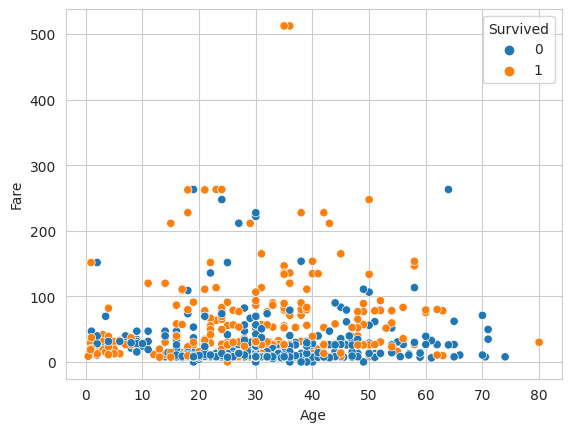

In [33]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)

<Axes: >

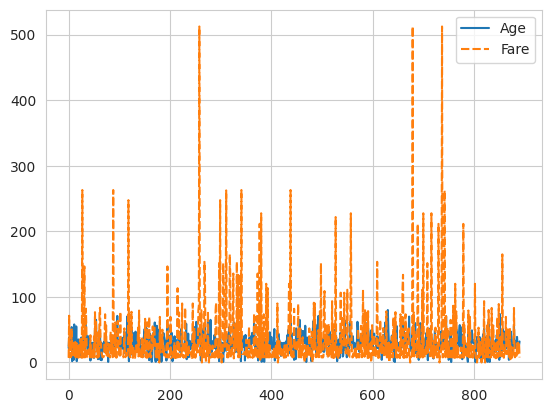

In [34]:
sns.lineplot(data=train[['Age', 'Fare']])

<Axes: xlabel='Age', ylabel='Density'>

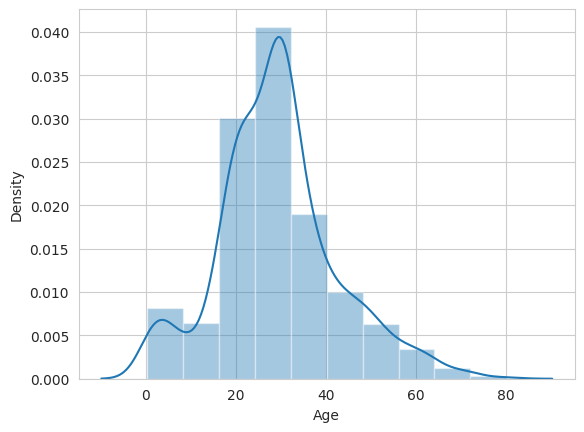

In [35]:
sns.distplot(train['Age'], bins=10, kde=True)

In [36]:
sns.countplot(train['Embarked'])

ValueError: could not convert string to float: 'S'

In [ ]:
sns.boxplot('Age', 'Sex', data=train)

In [ ]:
sns.heatmap(train.corr(), annot=True)

In [ ]:
sns.pairplot(train, hue='Survived')
plt.savefig('Pairplot.png')